In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
covid_data = pd.read_csv('/content/covid_data_neumerical.csv')

In [ ]:
covid_data.head()

In [ ]:
covid_data.shape

(1002, 28)

In [ ]:
covid_data.describe()

In [ ]:
correlation = covid_data.corr()
print(correlation)

                            ID  age_group       Sex     Fever     Cough  \
ID                    1.000000   0.202381  0.028770  0.106134  0.194796   
age_group             0.202381   1.000000 -0.009771  0.175281  0.178323   
Sex                   0.028770  -0.009771  1.000000  0.019781  0.010675   
Fever                 0.106134   0.175281  0.019781  1.000000  0.481682   
Cough                 0.194796   0.178323  0.010675  0.481682  1.000000   
Resp_dist             0.064918   0.085716 -0.012088  0.065147  0.049034   
Sore throat           0.000335   0.168145 -0.051530  0.345786  0.293080   
Chest pain            0.086433   0.164810 -0.063791  0.225313  0.258679   
Headache              0.067554   0.148257 -0.078807  0.380596  0.337094   
Diarrhea              0.016557   0.204578 -0.140848  0.223693  0.142869   
Dyspnea               0.051473   0.234431 -0.033729  0.301305  0.330463   
Myalgia               0.056381   0.178698 -0.084807  0.277783  0.272220   
Sleep disturbance     0.0

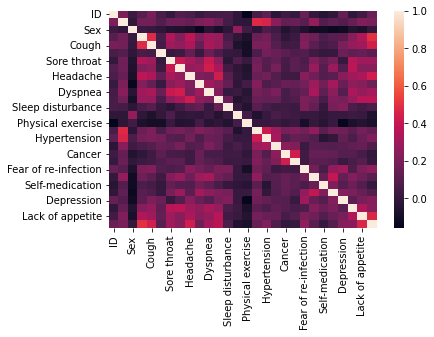

In [ ]:
sns.heatmap(correlation)

In [ ]:
covid_data['Persistent symptoms'].value_counts()

0    802
1    200
Name: Persistent symptoms, dtype: int64

0  = No Persistent Symtoms

1 = They have Persistent Symtoms


In [ ]:
covid_data.groupby('Persistent symptoms').mean()

,ID,age_group,Sex,Fever,Cough,Resp_dist,Sore throat,Chest pain,Headache,Diarrhea,...,Heart disease,Cancer,Kidney problems,Fear of re-infection,Hozpitalization,Self-medication,Depression,Sputum production,Lack of appetite,Fatigue
Persistent symptoms,,,,,,,,,,,,,,,,,,,,,
0,502.819202,1.475062,0.609726,0.776808,0.67207,0.25187,0.473815,0.273067,0.625935,0.203242,...,0.069825,0.013716,0.048628,0.563591,0.127182,0.195761,0.425187,0.349127,0.53616,0.700748
1,496.210000,1.710000,0.455000,0.885000,0.76500,0.26500,0.715000,0.615000,0.760000,0.550000,...,0.130000,0.065000,0.100000,0.885000,0.530000,0.425000,0.705000,0.595000,0.72500,0.805000


In [ ]:
# separating the data and labels
X = covid_data.drop(columns = 'Persistent symptoms', axis=1)
Y = covid_data['Persistent symptoms']

print(X)

        ID  age_group  Sex  Fever  Cough  Resp_dist  Sore throat  Chest pain  \
0        1          1    1      1      0          0            1           1   
1        2          1    1      1      0          0            0           0   
2        3          1    1      1      0          0            0           0   
3        4          1    0      1      1          0            1           1   
4        5          1    0      1      1          1            1           0   
...    ...        ...  ...    ...    ...        ...          ...         ...   
997    998          1    1      0      0          0            0           0   
998    999          1    1      1      0          0            0           0   
999   1000          1    0      1      1          0            1           0   
1000  1001          1    1      1      1          0            0           0   
1001  1002          1    1      1      1          0            1           0   

      Headache  Diarrhea  ...  Heart di

In [ ]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
997     0
998     0
999     0
1000    1
1001    0
Name: Persistent symptoms, Length: 1002, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[-1.73032308 -0.67563334  0.85298664 ...  1.22934055 -1.16043277
  -1.60978193]
 [-1.72686589 -0.67563334  0.85298664 ... -0.81344425 -1.16043277
  -1.60978193]
 [-1.7234087  -0.67563334  0.85298664 ... -0.81344425  0.86174747
  -1.60978193]
 ...
 [ 1.7234087  -0.67563334 -1.17235131 ...  1.22934055  0.86174747
   0.62120215]
 [ 1.72686589 -0.67563334  0.85298664 ...  1.22934055  0.86174747
  -1.60978193]
 [ 1.73032308 -0.67563334  0.85298664 ...  1.22934055 -1.16043277
  -1.60978193]]


In [ ]:
X = standardized_data
Y = covid_data['Persistent symptoms']

print(X)
print(Y)

[[-1.73032308 -0.67563334  0.85298664 ...  1.22934055 -1.16043277
  -1.60978193]
 [-1.72686589 -0.67563334  0.85298664 ... -0.81344425 -1.16043277
  -1.60978193]
 [-1.7234087  -0.67563334  0.85298664 ... -0.81344425  0.86174747
  -1.60978193]
 ...
 [ 1.7234087  -0.67563334 -1.17235131 ...  1.22934055  0.86174747
   0.62120215]
 [ 1.72686589 -0.67563334  0.85298664 ...  1.22934055  0.86174747
  -1.60978193]
 [ 1.73032308 -0.67563334  0.85298664 ...  1.22934055 -1.16043277
  -1.60978193]]
0       1
1       0
2       1
3       0
4       0
       ..
997     0
998     0
999     0
1000    1
1001    0
Name: Persistent symptoms, Length: 1002, dtype: int64


Split Dataset on Test Data and Train Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1002, 27) (801, 27) (201, 27)


Support Vector Machine

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

prediction = classifier.predict(X_test)
accuracy = accuracy_score(prediction, Y_test)

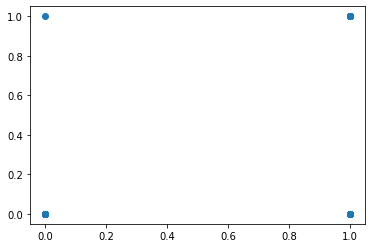

In [ ]:
plt.scatter(Y_test, prediction)

In [ ]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       161
           1       0.95      0.45      0.61        40

    accuracy                           0.89       201
   macro avg       0.91      0.72      0.77       201
weighted avg       0.89      0.89      0.87       201



In [ ]:
print('Accuracy:',accuracy)

Accuracy: 0.8855721393034826


Logistic Regression

In [ ]:
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)

prediction = classifier.predict(X_test)
accuracy = accuracy_score(prediction, Y_test)

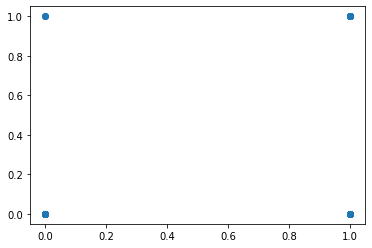

In [ ]:
plt.scatter(Y_test, prediction)

In [ ]:
print(classification_report(Y_test, prediction))

In [ ]:
print('Accuracy:',accuracy)

Accuracy: 0.8905472636815921


Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, Y_train)
p = gnb.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, p))

Accuracy: 0.7810945273631841


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, Y_train)
p = regr.score(X_test, Y_test)

print('Accuracy:' ,p)

Accuracy: 0.2870952902728071


AdaBoost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
#from sklearn.svm import SVC

#svc=SVC(probability=True, kernel='linear')

abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
model = abc.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.8805970149253731
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       161
           1       0.94      0.42      0.59        40

    accuracy                           0.88       201
   macro avg       0.91      0.71      0.76       201
weighted avg       0.89      0.88      0.86       201



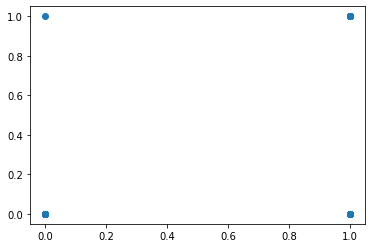

In [ ]:
plt.scatter(Y_test, y_pred)

Gradient Boosting Classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

gradient_booster.fit(X_train,Y_train)
y_prep = gradient_booster.predict(X_test)

print('Accuracy:', metrics.accuracy_score(Y_test, y_prep))
print(classification_report(Y_test, y_prep))

Accuracy: 0.8756218905472637
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       161
           1       0.78      0.53      0.63        40

    accuracy                           0.88       201
   macro avg       0.83      0.74      0.78       201
weighted avg       0.87      0.88      0.87       201



XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 10, alpha = 10, n_estimators = 50)

xg_reg.fit(X_train,Y_train)

y_pred = xg_reg.predict(X_test)

#Applying the K-Fold Cross Validation
accuracies = cross_val_score(estimator = xg_reg, X = X_train, y = Y_train, cv = 10)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))


[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re